In [6]:
import re,string,nltk,csv
import gensim
import pandas as pd
from gensim import corpora
from nltk.tokenize import word_tokenize , TweetTokenizer
from nltk.stem import WordNetLemmatizer
from gensim.models import LdaModel, LdaMulticore
from nltk.corpus import stopwords
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    
data = pd.read_csv(r'C:\Users\vittal\Desktop\AIM\tweet senti analysis\nlp-twitter-sentiment-master\nlp-twitter-sentiment-master\trump_tweets.csv')
tknzr = TweetTokenizer()   #initialize the tokenizer
wnl=WordNetLemmatizer()    #initialize lemmatizer
analyser = SentimentIntensityAnalyzer()   # initialize VADER sentiment analysis
stop_words = stopwords.words('english') + ['...']  #stop words to be removed
punctuation=set(string.punctuation)   # punctuations to be removed
data.head()

,text,created_at,Unnamed: 2
0,RT @GOPChairwoman: House Democrats are engaged...,10-17-2019 15:09:09,NaN
1,RT @rww_gop: Voters are rejecting the Dems’ ba...,10-17-2019 15:08:35,NaN
2,As the Witch Hunt continues! https://t.co/klvv...,10-17-2019 15:07:46,NaN
3,The Greatest Witch Hunt in American History! h...,10-17-2019 13:14:49,NaN
4,"RT @realDonaldTrump: Years of BAD GOVERNMENT, ...",10-17-2019 12:59:25,NaN


In [10]:
#this function clean tweet, pre-processes the tweets
def clean_tweet(tweet):
        tweet=tweet.lower()          # converts the tweets tro lower case
        tweet=re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', tweet) # removes links in the tweets
        tweet=tknzr.tokenize(tweet)              #tokenize the tweets into words
        new_tweet=[]
        for word in tweet:
            word=wnl.lemmatize(word)      #lemmatize the words
            if word not in (stop_words) and word not in punctuation: # remove stop words and punctuations from the tweets
                new_tweet.append(word)
        return new_tweet
for row in data.iterrows():
    row[1]["text"]=clean_tweet(row[1]["text"])
data.head() #this data-frame now contains all cleaned tweets

,text,created_at,Unnamed: 2
0,"[rt, @gopchairwoman, house, democrat, engaged,...",10-17-2019 15:09:09,NaN
1,"[rt, @rww_gop, voter, rejecting, dems, ’, base...",10-17-2019 15:08:35,NaN
2,"[witch, hunt, continues]",10-17-2019 15:07:46,NaN
3,"[greatest, witch, hunt, american, history]",10-17-2019 13:14:49,NaN
4,"[rt, @realdonaldtrump, year, bad, government, ...",10-17-2019 12:59:25,NaN


In [7]:
#  LDA for classification of tweets into different topic
# I haved used this in the code because the results were'nt very accurate and 
#the ML algorithm could'nt isolate the trade related tweets completely
dictionary = corpora.Dictionary(data["text"])
mycorpus = [dictionary.doc2bow(tweet, allow_update=True) for tweet in data["text"]]
word_counts = [[(dictionary[id], count) for id, count in line] for line in mycorpus]
lda_model = gensim.models.ldamodel.LdaModel(corpus=mycorpus,id2word=dictionary,
num_topics=30, passes = 10)
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))
    




Topic: 0 
Words: 0.029*"book" + 0.028*"wa" + 0.027*"yesterday" + 0.023*"enjoy" + 0.020*"new" + 0.020*"took" + 0.019*"congressman" + 0.017*"great" + 0.016*"statement" + 0.015*"call"
Topic: 1 
Words: 0.035*"pelosi" + 0.029*"nancy" + 0.028*"schumer" + 0.023*"called" + 0.022*"sad" + 0.022*"chuck" + 0.018*"raise" + 0.016*"committed" + 0.015*"freedom" + 0.014*"travel"
Topic: 2 
Words: 0.046*"year" + 0.024*"washington" + 0.023*"month" + 0.022*"pay" + 0.018*"time" + 0.016*"ago" + 0.015*"plan" + 0.014*"hit" + 0.014*"post" + 0.014*"repeal"
Topic: 3 
Words: 0.075*"north" + 0.068*"korea" + 0.047*"meeting" + 0.025*"south" + 0.025*"full" + 0.025*"florida" + 0.023*"finally" + 0.021*"kim" + 0.021*"ready" + 0.020*"carolina"
Topic: 4 
Words: 0.039*"tax" + 0.029*"economy" + 0.027*"ever" + 0.026*"u" + 0.024*"cut" + 0.024*"mexico" + 0.023*"year" + 0.023*"history" + 0.022*"country" + 0.022*"number"
Topic: 5 
Words: 0.079*"today" + 0.060*"great" + 0.051*"honor" + 0.049*"wa" + 0.045*"house" + 0.037*"white" + 

In [8]:
#seperating tweets which could affect the market based on bag of words approach
trade_tweets=["trade", "currency", "economy", "growth",  "trade-war", "rates", "inflation", "manipulation", "dollar", "Fed", "Powell", "tariffs"]
for i in range(len(trade_tweets)):
    trade_tweets[i]=wnl.lemmatize(trade_tweets[i])  #lemmatize the words in our bag of words for trade realted tweets as well so that it is coherant with our lemmatized tweeets
    
#this function istrade_tweet checks if the tweet could affect the markets or not. For a tweet to be classified as trade related
# two or more words should be matching from our bag of words
def istrade_tweet(tweet):
    x=0
    for word in trade_tweets: 
        if word in tweet:
            x+=1    
    if x>1:
        return True
    else:
        return False
        
        
            
for index,row in data.iterrows():
    if (istrade_tweet(row["text"]))==False:
        data.drop(index, inplace=True)
        
data.head() # these are the tweets which are related to trade and can affect the S&P500 index

,text,created_at,Unnamed: 2
291,"[understands, 50, soldier, remaining, section,...",10/8/2019 12:55,NaN
354,"[@60minutes, “, forgot, ”, report, helping, gr...",10/6/2019 23:54,NaN
515,"[u, 7.5, billion, award, world, trade, organiz...",10/3/2019 10:00,NaN
549,"[predicted, jay, powell, federal, reserve, all...",10/1/2019 14:34,NaN
966,"[rt, @govbilllee, usmca, 21st, century, trade,...",09-16-2019 20:51:10,NaN


In [9]:
data.insert(1,"Sentiment","Positive")

#this function uses VADER to calculate the sentiment of our tweet. VADER gives a score between [-1,1] to signify if a 
# tweet is positive or negative. We have assumed that all tweets having a score between [-0.4,0.4] are neutral and rest
#positive or negative
def analyze_sentiment(tweet):
    listToStr = ' '.join(map(str, tweet))
    analysis = analyser.polarity_scores(listToStr)
    if analysis['compound'] > 0.4:
        return 'Positive'
    elif analysis['compound'] < -0.4:
        return 'Negative'
    else:
        return 'Neutral'

for index,row in data.iterrows():
    row["Sentiment"]=analyze_sentiment(row["text"])
    
data.head() # table containg the sentiment of each tweet     

,text,Sentiment,created_at,Unnamed: 2
291,"[understands, 50, soldier, remaining, section,...",Negative,10/8/2019 12:55,NaN
354,"[@60minutes, “, forgot, ”, report, helping, gr...",Positive,10/6/2019 23:54,NaN
515,"[u, 7.5, billion, award, world, trade, organiz...",Positive,10/3/2019 10:00,NaN
549,"[predicted, jay, powell, federal, reserve, all...",Negative,10/1/2019 14:34,NaN
966,"[rt, @govbilllee, usmca, 21st, century, trade,...",Neutral,09-16-2019 20:51:10,NaN


In [27]:
#this block of code drops all the tweets which have a neutral sentiment. This is because according the trading strategy
# we wont take any action if we encounter a neutral tweet.
for index,row in data.iterrows():
    if row["Sentiment"]=="Neutral":
        data.drop(index, inplace=True)
        
        
sp500=pd.read_csv(r"C:\Users\vittal\Desktop\AIM\tweet senti analysis\nlp-twitter-sentiment-master\nlp-twitter-sentiment-master\yahoo finance s&p500.csv")
sp500['Date'] = pd.to_datetime(sp500['Date'])
data['created_at'] = pd.to_datetime(data['created_at'])
sp500.insert(1,"Portfolio",0)   # this is the value of our portfolio
sp500.insert(1,"Units",0)     # this column stores the units of SPY ticker we have
sp500.insert(1,"Cash",0)   #this column stores the extra money we have earned by our strategy
sp500.loc[0,"Units"]=1
sp500.loc[0,"Portfolio"]=2269.959961

sp500.head()
        

,Date,Cash,Units,Portfolio,Open,High,Low,Close,Adj Close,Volume
0,2017-01-20,0,1,2269.959961,2269.959961,2276.959961,2265.010010,2271.310059,2271.310059,3524970000
1,2017-01-23,0,0,0.000000,2267.780029,2271.780029,2257.020020,2265.199951,2265.199951,3152710000
2,2017-01-24,0,0,0.000000,2267.879883,2284.629883,2266.679932,2280.070068,2280.070068,3810960000
3,2017-01-25,0,0,0.000000,2288.879883,2299.550049,2288.879883,2298.370117,2298.370117,3846020000
4,2017-01-26,0,0,0.000000,2298.629883,2300.989990,2294.080078,2296.679932,2296.679932,3610360000


In [28]:
#this part of the code implements the trading strategy which I have created to maximise the return in the SPY ticker.
prevunit=1
prevcash=0
action="none"
opening_time=datetime.time(9,30,0) #opening time of the US Markets
closing_time=datetime.time(16,30,0) #closing time of the US Markets
for index,row in sp500.iterrows():
    count=0
    if action!="none":   
        if action=="longed_market":
            action="none"
            prevcash+=((prevunit-1)*row["Close"])-(5000+(5000*(1.78/100)*(1/365)))  # returning the 5k borrowed plus the interest at risk free rate of 1.78 percent
            #we sold everything except 1 unit and then returned the borrowed sum
            prevunit=1
        elif action=="Shorted_market":
            action="none"
            prevcash=prevcash-((1-prevunit)*row["Close"]) #subtracted the shorted units from my cash and bought 1 unit
            #to come back to normal exposure to S&P500 which is 1 unit
            prevunit=1

        elif action=="after_market_positive":
            #buy at open and sell at close
            units_bought=5000/row["Open"]
            money_received=units_bought*row["Close"]
            prevcash+=money_received-5000
            action="none"
            prevunit=1

        elif action == "after_market_negative":
            #sell and short at market open, buy back at close
            prevcash+=(prevunit*(row["Open"]-row["Close"])) + 5000
            prevcash=prevcash-((5000/row["Open"])*row["Close"]) # the shorted amount
            action="none"
            prevunit=1

        sp500.loc[index,"Units"]=prevunit
        sp500.loc[index,"Portfolio"]=prevunit*row["Close"]
        sp500.loc[index,"Cash"]=prevcash 

    for idx,rows in data.iterrows():  
        if (row["Date"].date())==(rows["created_at"].date()):   # check if on a particular day has there been a tweet or not
            if rows["created_at"].time() > opening_time and rows["created_at"].time() < closing_time:
                # if tweet is betweent the market hours
                if rows["Sentiment"]=="Positive": 
                    #if tweet is positive we buy at market close and sell the extra stock at tomorrow's closing price
                    units_bought=5000/row["Close"]  #borrowed 5000 at risk free rate 1.78%(T bond issued by US government)
                    prevunit=prevunit+units_bought
                    sp500.loc[index,"Units"]=prevunit
                    sp500.loc[index,"Portfolio"]=prevunit*row["Close"]
                    sp500.loc[index,"Cash"]=prevcash
                    action="longed_market"
                    count=1

                else:
                    #if sentiment of tweet is Negative
                    #we are shorting the stock and also selling what we currently own
                    #hence our exposure to s&p500 is 0 and we come back to original number of units at tomorrow's closing price
                    # shorting for money worth 5000 so adding it temporarily to cash and then subtract tomorrow when we buy back our original shares
                    prevcash=prevcash+(prevunit*row["Close"])+5000
                    sp500.loc[index,"Cash"]=prevcash
                    action="Shorted_market"
                    sp500.loc[index,"Portfolio"]=0
                    prevunit=-5000/row["Close"] # units we shorted for 5K
                    sp500.loc[index,"Units"]=prevunit       
                    count=1




            if rows["created_at"].time() < opening_time: 
                if rows["Sentiment"]=="Positive": 
                    # if the sentiment of tweet is +ve and is tweeted before the market opens
                    # we would invest 5000 at the opening price and sell the extras to come back to 1 unit at closing price
                    # we borrowed money in the morning and returned at market close, hence assuming no interest for [7 hours]
                    units_bought=5000/row["Open"]
                    money_received=units_bought*row["Close"]
                    prevcash+=money_received-5000
                    sp500.loc[index,"Units"]=prevunit
                    sp500.loc[index,"Portfolio"]=prevunit*row["Close"]
                    sp500.loc[index,"Cash"]=prevcash
                    count=1

                else:
                    # if we get a negative tweet before market opens we sell everything we have at opening price as well as short
                    #the market for 5000, We come back to original 1 unit at closing price
                    prevcash+=(prevunit*(row["Open"]-row["Close"])) + 5000
                    prevcash=prevcash-(5000/row["Open"])*row["Close"] # the shorted amount
                    sp500.loc[index,"Units"]=prevunit
                    sp500.loc[index,"Portfolio"]=prevunit*row["Close"]
                    sp500.loc[index,"Cash"]=prevcash 
                    count=1

            if rows["created_at"].time() > closing_time :
                if rows["Sentiment"]=="Positive":
                    #if we get a positive tweet after market closes we buy for 5k at tomorrow's open and sell
                    #at tomorrow's close
                    action="after_market_positive"
                    count=0
                else:
                    #if we get a negative tweet after market closes we sell and short at tomorrow's open and come 
                    #back to regular exposure to S&P500 at closing price
                    action="after_market_negative"
                    count=0  
            break;

    if count==0:
        sp500.loc[index,"Units"]=prevunit
        sp500.loc[index,"Portfolio"]=prevunit*row["Close"]
        sp500.loc[index,"Cash"]=prevcash





pd.set_option('display.max_rows', 700)
sp500

# This table shows the complete details of how my portfolio value changed from day to day transaction

,Date,Cash,Units,Portfolio,Open,High,Low,Close,Adj Close,Volume
0,2017-01-20,0.000000,1.000000,2271.310059,2269.959961,2276.959961,2265.010010,2271.310059,2271.310059,3524970000
1,2017-01-23,0.000000,1.000000,2265.199951,2267.780029,2271.780029,2257.020020,2265.199951,2265.199951,3152710000
2,2017-01-24,0.000000,1.000000,2280.070068,2267.879883,2284.629883,2266.679932,2280.070068,2280.070068,3810960000
3,2017-01-25,0.000000,1.000000,2298.370117,2288.879883,2299.550049,2288.879883,2298.370117,2298.370117,3846020000
4,2017-01-26,0.000000,1.000000,2296.679932,2298.629883,2300.989990,2294.080078,2296.679932,2296.679932,3610360000
5,2017-01-27,0.000000,1.000000,2294.689941,2299.020020,2299.020020,2291.620117,2294.689941,2294.689941,3135890000
6,2017-01-30,0.000000,1.000000,2280.899902,2286.010010,2286.010010,2268.040039,2280.899902,2280.899902,3591270000
7,2017-01-31,0.000000,1.000000,2278.870117,2274.020020,2279.090088,2267.209961,2278.870117,2278.870117,4087450000
8,2017-02-01,0.000000,1.000000,2279.550049,2285.590088,2289.139893,2272.439941,2279.550049,2279.550049,3916610000
9,2017-02-02,0.000000,1.000000,2280.850098,2276.689941,2283.969971,2271.649902,2280.850098,2280.850098,3807710000


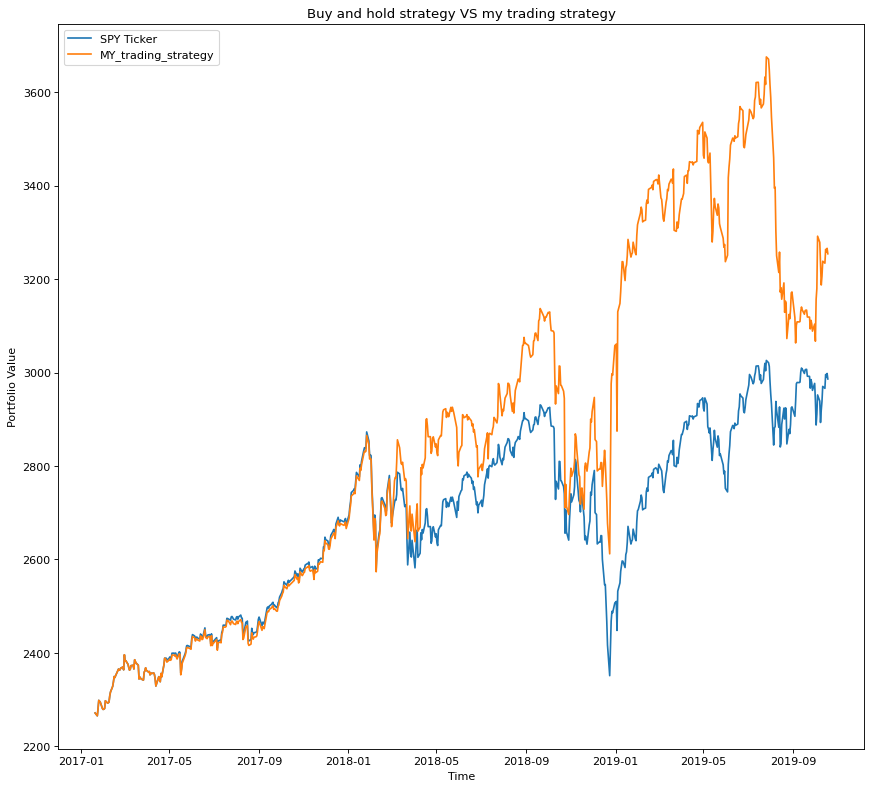

In [31]:
sp500['Value']=[0]*len(sp500.index)
for index,row in sp500.iterrows():
    if row["Units"]<1:
        sp500.loc[index,"Value"]=row["Cash"]-5000
    elif row["Units"]>1:
        sp500.loc[index,"Value"]=row["Cash"]+row["Portfolio"]-5000
    else:
        sp500.loc[index,"Value"]=row["Cash"]+row["Portfolio"]

# Plot the graph of the portfolio value of the two strategies
sp500=sp500[["Date","Close","Value"]]
figure(num=None, figsize=(13, 12), dpi=80, facecolor='w', edgecolor='k')
plt.plot(sp500["Date"],sp500["Close"], label = "SPY Ticker") 
plt.plot(sp500["Date"],sp500["Value"], label = "MY_trading_strategy") 
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.title('Buy and hold strategy VS my trading strategy') 
plt.legend() 
plt.show() 

# we can see from this graph that our trading_strategy is performing much better than the traditional buy&hold strategy.
# in the end if we use sentiments and invest accordingly we are gaining $272.269093 more than buy&hold